## Make plot ERF 2019


This script uses code produced by Bill Collins to produce an emission based estimate of ERF in 2019 vs 1750 based on Thornhill et al 2021. 


Thornhill, Gillian D., William J. Collins, Ryan J. Kramer, Dirk Olivié, Ragnhild B. Skeie, Fiona M. O’Connor, Nathan Luke Abraham, et al. “Effective Radiative Forcing from Emissions of Reactive Gases and Aerosols – a Multi-Model Comparison.” Atmospheric Chemistry and Physics 21, no. 2 (January 21, 2021): 853–74. https://doi.org/10.5194/acp-21-853-2021.


In [1]:
import pandas as pd
import numpy.testing
from numpy.testing import assert_allclose
from ar6_ch6_rcmipfigs.utils.plot import get_chem_col
from ar6_ch6_rcmipfigs.constants import RESULTS_DIR, INPUT_DATA_DIR_BADC
from pathlib import  Path
import numpy as np
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>

/Users/sarablichner/science/PHD/IPCC/public/AR6_CH6_RCMIPFIGSv2/ar6_ch6_rcmipfigs
/Users/sarablichner/science/PHD/IPCC/public/AR6_CH6_RCMIPFIGSv2/ar6_ch6_rcmipfigs/data_in


### Output filenames.

In [2]:
# standard deviation filename:
fn_sd = RESULTS_DIR/'tables_historic_attribution/table_uncertainties_smb_plt.csv'
# mean filename
fn_mean = RESULTS_DIR/'tables_historic_attribution/table_mean_smb_plt.csv'

## Get tables from script from Bill

In [3]:
from ar6_ch6_rcmipfigs.notebooks.GSAT_change_hist_attribution.utils_hist_att import attribution_1750_2019_newBC_smb

/Users/sarablichner/science/PHD/IPCC/public/AR6_CH6_RCMIPFIGSv2/ar6_ch6_rcmipfigs/notebooks/GSAT_change_hist_attribution/utils_hist_att/attribution_1750_2019_newBC_smb.py:91: RuntimeWarning: invalid value encountered in true_divide
  ch4_sd = (ch4-ch4_2014)*lifech4_sd/lifech4
/Users/sarablichner/science/PHD/IPCC/public/AR6_CH6_RCMIPFIGSv2/ar6_ch6_rcmipfigs/notebooks/GSAT_change_hist_attribution/utils_hist_att/attribution_1750_2019_newBC_smb.py:105: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rfo3_prime_sd[i_ch4] = np.sqrt(np.sum(np.square(rfo3_prime_sd[[i_non_ch4]])))
/Users/sarablichner/science/PHD/IPCC/public/AR6_CH6_RCMIPFIGSv2/ar6_ch6_rcmipfigs/notebooks/GSAT_change_hist_attribution/utils_hist_att/attribution_1750_2019_newBC_smb.py:120: FutureWarning: Usin

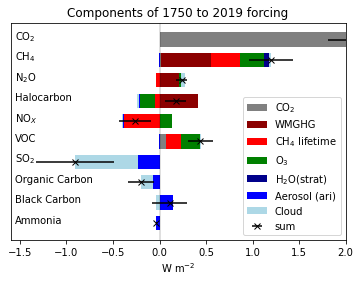

In [4]:
table, table_sd = attribution_1750_2019_newBC_smb.main(plot=True)

In [5]:
table.sum()#_sd

CO2             2.144647e+00
GHG             1.160000e+00
CH4_lifetime    2.775558e-17
O3              4.700000e-01
O3_prime       -2.081668e-17
Strat_H2O       5.000000e-02
Aerosol        -2.200000e-01
Cloud          -8.037083e-01
Total           2.800939e+00
dtype: float64

In [6]:
import matplotlib.pyplot as plt
import numpy as np

## Make one category with both CH4 from emissions and change in lifetime 

In [7]:
ch4_ghg_old = table.loc['CH4','GHG']
ch4_lftime_old = table.loc['CH4','CH4_lifetime']

table.loc['CH4','CH4_lifetime'] = ch4_lftime_old + ch4_ghg_old
table.loc['CH4','GHG'] = 0.

## Scale cloud forcing to fit mest estimate 0.84

In [8]:
table_c = table.copy()
correct_cloud_forcing = - 0.84
scale_fac = correct_cloud_forcing/table.sum()['Cloud']
table_c['Cloud']=scale_fac*table['Cloud']
table_c.sum()

CO2             2.144647e+00
GHG             6.200000e-01
CH4_lifetime    5.400000e-01
O3              4.700000e-01
O3_prime       -2.081668e-17
Strat_H2O       5.000000e-02
Aerosol        -2.200000e-01
Cloud          -8.400000e-01
Total           2.800939e+00
dtype: float64

## Add together O3 primary and O3

In [9]:
o3_sum = table_c['O3']+table_c['O3_prime']
tab2 = table_c.copy(deep=True).drop(['O3','O3_prime','Total'], axis=1)
tab2['O3'] = o3_sum

## Replace GHG with N2O and HC

In [10]:
table_ed = tab2.copy(deep=True)
_ghg = tab2.loc['HC','GHG']
table_ed.loc['HC','GHG'] = 0
table_ed['HC'] = 0
table_ed.loc['HC','HC']=_ghg
table_ed
_ghg = tab2.loc['N2O','GHG']
table_ed.loc['N2O','GHG'] = 0
table_ed['N2O']=0
table_ed.loc['N2O','N2O']=_ghg
table_ed = table_ed.drop('GHG', axis=1)
table_ed

,CO2,CH4_lifetime,Strat_H2O,Aerosol,Cloud,O3,HC,N2O
Species,,,,,,,,
CO2,2.057554,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.00
CH4,0.017549,0.844457,0.05,-0.002653,0.018421,0.266736,0.00,0.00
N2O,0.000000,-0.035967,0.00,-0.002090,0.042503,0.026124,0.00,0.21
HC,0.000053,-0.050927,0.00,-0.008080,-0.017419,-0.162033,0.41,0.00
NOx,0.000000,-0.380025,0.00,-0.009166,-0.014458,0.137102,0.00,0.00
VOC,0.069491,0.162462,0.00,-0.002573,0.008884,0.202071,0.00,0.00
SO2,0.000000,0.000000,0.00,-0.234228,-0.703784,0.000000,0.00,0.00
OC,0.000000,0.000000,0.00,-0.072143,-0.136919,0.000000,0.00,0.00
BC,0.000000,0.000000,0.00,0.144702,-0.037227,0.000000,0.00,0.00


 No need to fix std because we only use the total (which is not influenced by the summation above). 

In [11]:
table_sd

,CO2_sd,GHG_sd,CH4_lifetime_sd,O3_sd,O3_prime_sd,Strat_H2O_sd,Aerosol_sd,Cloud_sd,Total_sd
Species,,,,,,,,,
CO2,0.246907,0.0000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.246907
CH4,0.002106,0.0756,0.123938,0.036693,0.034401,0.05,0.002197,0.092581,0.236538
N2O,0.000000,0.0294,0.028548,0.015462,0.003236,0.00,0.002021,0.042169,0.061736
HC,0.000006,0.0574,0.032639,0.077735,0.004558,0.00,0.001971,0.049554,0.116583
NOx,0.000000,0.0000,0.107711,0.088303,0.030102,0.00,0.004543,0.057188,0.170036
VOC,0.008339,0.0000,0.059041,0.057143,0.015687,0.00,0.005065,0.098979,0.136683
SO2,0.000000,0.0000,0.000000,0.000000,0.000000,0.00,0.223907,0.354996,0.419710
OC,0.000000,0.0000,0.000000,0.000000,0.000000,0.00,0.065461,0.123676,0.139932
BC,0.000000,0.0000,0.000000,0.000000,0.000000,0.00,0.158984,0.100321,0.187990


Write tables to file.

In [12]:
table_ed.to_csv(RESULTS_DIR/'tables_historic_attribution/table_mean_smb_orignames.csv')
table_sd.to_csv(RESULTS_DIR/'tables_historic_attribution/table_std_smb_orignames.csv')

In [13]:
from ar6_ch6_rcmipfigs.utils.plot import get_chem_col

Variables in the rigth order:

In [14]:
varn = ['co2','N2O','HC','ch4','o3','H2O_strat','ari','aci']
var_dir = ['CO2','N2O','HC','CH4_lifetime','O3','Strat_H2O','Aerosol','Cloud']

Colors:

In [15]:
cols = [get_chem_col(var) for var in varn]

(0.9568627450980393, 0.796078431372549, 0.21176470588235294)
(0.8274509803921568, 0.0, 0.1568627450980392)
(0.47843137254901963, 0.5058823529411764, 0.5058823529411764)
(1.0, 0.4196078431372549, 0.07450980392156863)
(0.5254901960784314, 0.7803921568627451, 0.29411764705882354)
(0.47843137254901963, 0.5058823529411764, 0.5058823529411764)
(0.792156862745098, 0.6980392156862745, 0.8392156862745098)
(0.5607843137254902, 0.0, 0.6470588235294118)


## Uncertainty:

We have the standard deviation, but would like the use the standard error of the mean AND we would like to calculate the 5-95th percentile. 

We have the standard deviation (as far as I can tell, not the unbiased one)

$\sigma=\sqrt {\frac {\sum _{i=1}^{n}(x_{i}-{\overline {x}})^{2}}{n}}$

The unbiased estimator would be:

$s=\sqrt {\frac {\sum _{i=1}^{n}(x_{i}-{\overline {x}})^{2}}{n-1}} = \sigma \cdot \sqrt{ \frac{n}{n-1}}$

The standard error is:

$SE = \frac{\sigma}{n}$

Finally, we want 5-95th percentile. Assuming normal distribution, this amounts to multiplying the standard error by 1.645

In [16]:
std_2_95th = 1.645

In [17]:
from ar6_ch6_rcmipfigs.utils.badc_csv import read_csv_badc
import pandas as pd
num_mod_lab = 'Number of models (Thornhill 2020)'
thornhill = read_csv_badc(INPUT_DATA_DIR_BADC/'table2_thornhill2020.csv', index_col=0)
thornhill.index = thornhill.index.rename('Species')
thornhill

,n,Number of models (Thornhill 2020)
Species,,
BC,6,7
CH4,7,8
N2O,4,5
HC,4,6
NOx,4,5
VOC,4,5
SO2,5,6
OC,5,6
NH3,2,2


![](thornhill.jpg)

In [18]:
sd_tot = table_sd['Total_sd']
df_err= pd.DataFrame(sd_tot.rename('std'))
df_err['SE'] = df_err

df_err['SE'] = df_err['std']/np.sqrt(thornhill[num_mod_lab])
df_err['95-50_SE'] = df_err['SE']*std_2_95th
df_err.loc['CO2','95-50_SE']= df_err.loc['CO2','std']
df_err

df_err['95-50'] = df_err['std']*std_2_95th
df_err.loc['CO2','95-50']= df_err.loc['CO2','std']
df_err

,std,SE,95-50_SE,95-50
Species,,,,
CO2,0.246907,NaN,0.246907,0.246907
CH4,0.236538,0.083629,0.137569,0.389105
N2O,0.061736,0.027609,0.045417,0.101555
HC,0.116583,0.047595,0.078293,0.191779
NOx,0.170036,0.076043,0.125090,0.279710
VOC,0.136683,0.061127,0.100553,0.224844
SO2,0.419710,0.171346,0.281864,0.690423
OC,0.139932,0.057127,0.093974,0.230188
BC,0.187990,0.071053,0.116883,0.309243


## Rename some variables

In [19]:
rename_dic_cat = {
    'CO2':'Carbon dioxide (CO$_2$)',
    'GHG':'WMGHG',
    'CH4_lifetime': 'Methane (CH$_4$)',
    'O3': 'Ozone (O$_3$)',
    'Strat_H2O':'H$_2$O (strat)',
    'Aerosol':'Aerosol-radiation',
    'Cloud':'Aerosol-cloud',
    'N2O':'N$_2$O',
    'HC':'CFC + HCFC',

}
rename_dic_cols ={
    'CO2':'CO$_2$',
    'CH4':'CH$_4$',
    'N2O':'N$_2$O',
    'HC':'CFC + HCFC',
    'NOx':'NO$_x$',
    'VOC':'NMVOC + CO',
    'SO2':'SO$_2$',
    'OC':'Organic carbon',
    'BC':'Black carbon',
    'NH3':'Ammonia'
}
tab_plt = table_ed.loc[::-1,var_dir].rename(rename_dic_cat, axis=1).rename(rename_dic_cols, axis=0)
tab_plt

,Carbon dioxide (CO$_2$),N$_2$O,CFC + HCFC,Methane (CH$_4$),Ozone (O$_3$),H$_2$O (strat),Aerosol-radiation,Aerosol-cloud
Species,,,,,,,,
Ammonia,0.000000,0.00,0.00,0.000000,0.000000,0.00,-0.033769,0.000000
Black carbon,0.000000,0.00,0.00,0.000000,0.000000,0.00,0.144702,-0.037227
Organic carbon,0.000000,0.00,0.00,0.000000,0.000000,0.00,-0.072143,-0.136919
SO$_2$,0.000000,0.00,0.00,0.000000,0.000000,0.00,-0.234228,-0.703784
NMVOC + CO,0.069491,0.00,0.00,0.162462,0.202071,0.00,-0.002573,0.008884
NO$_x$,0.000000,0.00,0.00,-0.380025,0.137102,0.00,-0.009166,-0.014458
CFC + HCFC,0.000053,0.00,0.41,-0.050927,-0.162033,0.00,-0.008080,-0.017419
N$_2$O,0.000000,0.21,0.00,-0.035967,0.026124,0.00,-0.002090,0.042503
CH$_4$,0.017549,0.00,0.00,0.844457,0.266736,0.05,-0.002653,0.018421


In [20]:
df_err = df_err.rename(rename_dic_cols, axis=0)
df_err.to_csv(fn_sd)
tab_plt.to_csv(fn_mean)

In [21]:
width = 0.7
kwargs = {'linewidth':.1,'edgecolor':'k'}

In [22]:
import seaborn as sns

In [23]:
ybar = np.arange(len(tab_plt)+1)#, -1)
ybar

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [24]:
table_ed.sum(axis=0)

CO2             2.144647
CH4_lifetime    0.540000
Strat_H2O       0.050000
Aerosol        -0.220000
Cloud          -0.840000
O3              0.470000
HC              0.410000
N2O             0.210000
dtype: float64

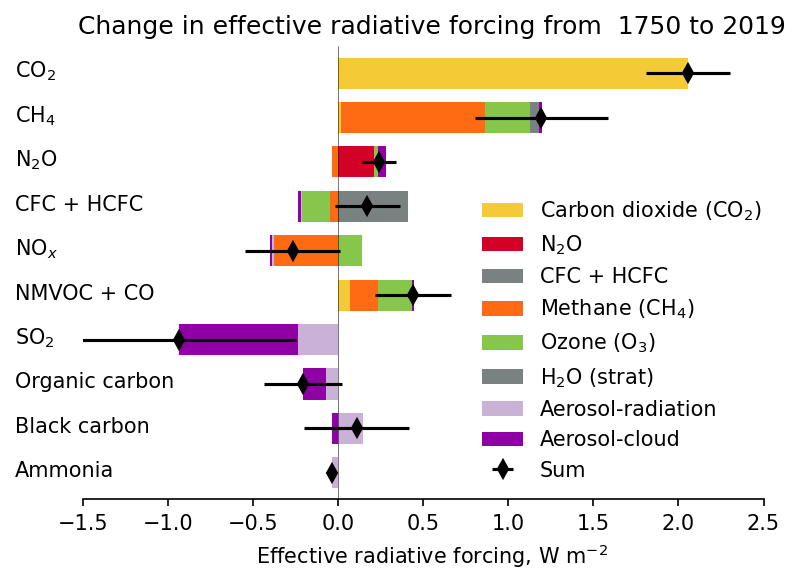

In [25]:
fig, ax = plt.subplots(dpi=150)#figsize=[10,10])


tab_plt.plot.barh(stacked=True, color=cols, linewidth=.0, edgecolor='k',ax=ax, width=width)
tot = table_ed.sum(axis=1)[::-1]#table_ed['Total'][::-1]
xerr = df_err['95-50'][::-1]
y = np.arange(len(tot))
plt.errorbar(tot, y,xerr=xerr,marker='d', linestyle='None', color='k', label='Sum', )
plt.legend(frameon=False)
ax.set_ylabel('')
sns.despine()





for lab, y in zip(tab_plt.index, ybar):
        #plt.text(-1.55, ybar[i], species[i],  ha='left')#, va='left')
    plt.text(-1.9, y-0.1, lab,  ha='left')#, va='left')
plt.title('Change in effective radiative forcing from  1750 to 2019')
plt.xlabel(r'Effective radiative forcing, W m$^{-2}$')
plt.xlim(-1.5, 2.6)
    #plt.xlim(-1.6, 2.0)
sns.despine(fig, left=True, trim=True)
plt.legend(loc='lower right', frameon=False)
plt.axvline(x=0., color='k', linewidth=0.25)
fn = 'attribution_1750_2019_5-95th.png'
fp = RESULTS_DIR /'figures_historic_attribution'/fn
fp.parent.mkdir(parents=True, exist_ok=True)
ax.set_yticks([])

plt.savefig(fp, dpi=300)
plt.savefig(fp.with_suffix('.pdf'), dpi=300)
plt.show()